In [47]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import numpy as np
import scipy.spatial
from numpy import linalg as LA
import copy

In [48]:
anzahl= np.round(np.logspace(1, np.log10(200), 32)).astype(int)
iteration=np.round(200000/anzahl).astype(int)
anzahl*iteration
print(iteration)
print(anzahl)

[20000 18182 16667 15385 13333 12500 11111 10000  9091  8333  7692  6897
  6250  5714  5128  4651  4255  3846  3509  3175  2899  2632  2381  2174
  1961  1786  1626  1471  1333  1212  1099  1000]
[ 10  11  12  13  15  16  18  20  22  24  26  29  32  35  39  43  47  52
  57  63  69  76  84  92 102 112 123 136 150 165 182 200]


In [49]:
np.full((len(anzahl)), 10000)
np.arange(0,len(anzahl),1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

### 1000 Atome

In [50]:
data= open("Results/times_for_diagonalizing_1000.npy", "rb")
time_dens_05=np.array(np.load(data))/60/60
time_dens_01=np.array(np.load(data))/60/60

(29, 3, 2)
1000
17.04645322561264
0.8809075752894084


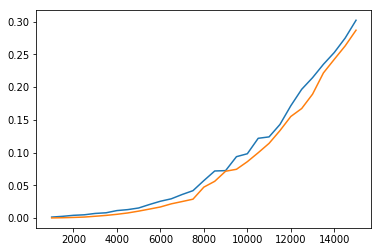

In [51]:
print(time_dens_05.shape)
atoms=np.arange(1000,15500,500)
time_config_05 = np.mean(time_dens_05[:,:,0], axis=1)
time_config_01 = np.mean(time_dens_01[:,:,0], axis=1)

time_diag_05 =  np.mean(time_dens_05[:,:,1],axis=1)
time_diag_01 =  np.mean(time_dens_01[:,:,1],axis=1)

time_total_05 = time_diag_05+time_config_05
time_total_01 = time_diag_01+time_config_01
plt.plot(atoms,time_total_05)
plt.plot(atoms, time_total_01)
print(atoms[np.argmin(time_diag_05)])
print(time_dens_05[-1,-1,-1]*60)
print(time_config_05[-1]*60)

Minimum für density 05:  1000 mit:  6.925138720759639
Minimum für density 01:  1000 mit:  0.5406558513641357


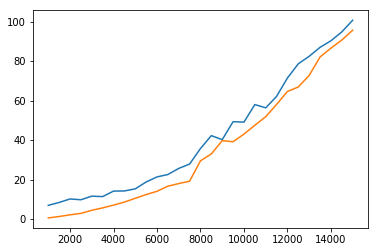

In [4]:
values=5000*1000

total_rescaled_05 = time_total_05/atoms*values
total_rescaled_01 = time_total_01/atoms*values
plt.plot(atoms,total_rescaled_05)
plt.plot(atoms, total_rescaled_01)
print("Minimum für density 05: ", atoms[np.argmin(total_rescaled_05)], "mit: ",min(total_rescaled_05))
print("Minimum für density 01: ", atoms[np.argmin(total_rescaled_01)], "mit: ",min(total_rescaled_01))

In [5]:
densities=np.arange(0.01,0.53,0.01)
print(atoms[np.argmin(total_rescaled_05)], "mit: ",min(total_rescaled_05)*len(densities)/24)
print(atoms[8], "mit: ",total_rescaled_05[8]*len(densities)/24)

1000 mit:  15.004467228312551
5000 mit:  33.072757566416705


In [6]:
steps=1/len(densities)
np.sum(min(total_rescaled_05)*np.arange(0,1,steps))/24

7.357959890807116

### Mehr Atome

[3.89920139]
[1.73783882]


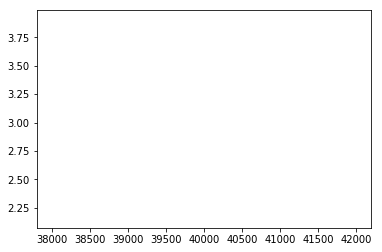

In [10]:
data= open("Results/times_for_diagonalizing_big4.npy", "rb")
time_dens_05=np.array(np.load(data))/60
time_dens_01=np.array(np.load(data))/60
atoms=np.array([20000,25000,30000])
atoms=np.array([40000])

time_config_05 = np.mean(time_dens_05[:,:,0], axis=1)
#time_config_01 = np.mean(time_dens_01[:,:,0], axis=1)

time_diag_05 =  np.mean(time_dens_05[:,:,1],axis=1)
#time_diag_01 =  np.mean(time_dens_01[:,:,1],axis=1)

time_total_05 = time_diag_05+time_config_05
#time_total_01 = time_diag_01+time_config_01


plt.plot()
plt.plot(atoms,time_total_05, label="total")
plt.plot(atoms,time_diag_05, label="diag")

# Parrellizing

In [4]:
from init_atoms import *

def generate_hamiltonian(atoms):
    number_atoms=len(atoms)
    
    #Distance + Hamiltonian-------------------------------------------------------------------------------------
    H = np.zeros((number_atoms,number_atoms),dtype=np.float16)
    global distance_matrix
    distance_matrix = np.zeros((number_atoms,number_atoms),dtype=np.float16)
    
    
    #start= time.time()
    distance_matrix= scipy.spatial.distance.cdist(atoms, atoms, metric='euclidean')
    np.fill_diagonal(distance_matrix,1)
    H=np.divide(coupling_constant,np.power(distance_matrix,3))
    np.fill_diagonal(distance_matrix,0)
    np.fill_diagonal(H,0)
    #print("Time for Hamiltonian: ",time.time()-start)
    
    
    global abstand_ursprung
    abstand_ursprung= np.zeros(number_atoms, dtype=np.float16)
    abstand_ursprung = copy.copy(distance_matrix[:,angeregt])
    
#Linearisierung---------------------------------------------------------------------------------------------
    #start = time.time()
    global eigenvalues
    eigenvalues=np.zeros(number_atoms,dtype=np.float16)
    global eigenvectors2
    eigenvectors=np.zeros((number_atoms,number_atoms),dtype=np.float16)
    eigenvalues, eigenvectors = LA.eigh(H)
    eigenvectors2=copy.copy(eigenvectors)
    #print("Time for Linearisierung: ",time.time()-start)

    return eigenvalues, eigenvectors,H

#------------------------------------------------------------------------------------------------

global coupling_constant
global gamma
global number_atoms
global atoms_array
global H
global angeregt

coupling_constant= -2.72*10**9 
r_b=2.5   
angeregt=0

atoms=np.arange(50,200,50)
times_dens_05=[[[[],[]] for i in range(3)] for i in range(len(atoms))]
times_dens_01=[[[[],[]] for i in range(3)] for i in range(len(atoms))]

In [5]:
atoms=np.array([1000,1000,1000])
it=1
times_05=[[[[],[]] for i in range(it)] for i in range(len(atoms))]
times_01=[[[[],[]] for i in range(it)] for i in range(len(atoms))]

x=time.time()
for k,number_atoms in enumerate(atoms):
    density=0.5
    radius = (np.sqrt(number_atoms*r_b**2/density))
    for j in range(it):
        start=time.time()
        atoms_array=produce_atoms(number_atoms, radius, r_b) 
        time1=time.time()-start
        start=time.time()
        eigenvalues, eigenvectors,H = generate_hamiltonian(atoms_array)
        time2=time.time()-start
        times_05[k][j][0]=time1
        times_05[k][j][1]=time2
        
    density=0.1
    radius = (np.sqrt(number_atoms*r_b**2/density))
    for j in range(it):
        start=time.time()
        atoms_array=produce_atoms(number_atoms, radius, r_b) 
        time1=time.time()-start
        start=time.time()
        eigenvalues, eigenvectors,H = generate_hamiltonian(atoms_array)
        time2=time.time()-start
        times_01[k][j][0]=time1
        times_01[k][j][1]=time2
print(time.time()-x)

20.85013461112976


In [6]:
def function(number_atoms):
    it=1
    times_dens_05=np.zeros((it,2))
    times_dens_01=np.zeros((it,2))

    density=0.5
    radius = (np.sqrt(number_atoms*r_b**2/density))
    for j in range(it):
        start=time.time()
        atoms_array=produce_atoms(number_atoms, radius, r_b) 
        time1=time.time()-start
        start=time.time()
        eigenvalues, eigenvectors,H = generate_hamiltonian(atoms_array)
        time2=time.time()-start
        
        times_dens_05[j][0] = time1 
        times_dens_05[j][1] = time2 
        
    density=0.1
    radius = (np.sqrt(number_atoms*r_b**2/density))
    for j in range(it):
        start=time.time()
        atoms_array=produce_atoms(number_atoms, radius, r_b) 
        time1=time.time()-start
        start=time.time()
        eigenvalues, eigenvectors,H = generate_hamiltonian(atoms_array)
        time2=time.time()-start
        
        times_dens_01[j][0] = time1 
        times_dens_01[j][1] = time2 
      
        
    data=open("test/test_"+str(number_atoms)+".npy","wb")
    np.save(data,times_dens_05 )
    np.save(data,times_dens_01 )
    return

In [8]:
import multiprocessing as mp
atoms=np.array([10])
x=time.time()
# Step 1: Init multiprocessing.Pool()
pool = mp.Pool(4)#mp.cpu_count()

# Step 2: `pool.apply` the `howmany_within_range()`
pool.map(function,atoms)
# Step 3: Don't forget to close
pool.close()    

print(time.time()-x)

Process ForkPoolWorker-12:
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
Process ForkPoolWorker-9:
  File "/home/jp/.local/lib/python3.5/site-packages/scipy/spatial/distance.py", line 2776, in cdist
    metric_name, **kwargs)
  File "/home/jp/Dokumente/Bachelorarbeit/Mein_paper/BwHpcCluster/init_atoms.py", line 93, in produce_atoms
    if ((np.min(scipy.spatial.distance.cdist(atoms_near, punkt, metric='euclidean')))<(2*r_b)):
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-6-c61c830f47b7>", line 10, in function
    atoms_array=produce_atoms(number_atoms, radius, r_b)
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/pytho

KeyboardInterrupt: 

### try to parallelize averages

In [14]:
import random
import numpy as np
def test(index):
    a=np.array([random.uniform(0,1) for i in range(3)])
    b=1
    c=2
    return a,a

In [16]:
import multiprocessing as mp

# Step 1: Init multiprocessing.Pool()
pool = mp.Pool(4)#mp.cpu_count()

# Step 2: `pool.apply` the `howmany_within_range()
a=pool.map(test,[0,1,2])

# Step 3: Don't forget to close
pool.close()    
print(a)

[(array([0.06819923, 0.48356596, 0.29562925]), array([0.06819923, 0.48356596, 0.29562925])), (array([0.03115203, 0.12914601, 0.33874765]), array([0.03115203, 0.12914601, 0.33874765])), (array([0.85717867, 0.23597612, 0.2565102 ]), array([0.85717867, 0.23597612, 0.2565102 ]))]


In [4]:
anzahl= np.round(np.logspace(np.log10(500), np.log10(15000), 32)).astype(int)
atoms=np.arange(1000,15500,500)

print(time_diag_05[8]*5000)

12/0.28
print(anzahl)
print(atoms[8])

NameError: name 'time_diag_05' is not defined